In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import pathlib
#from tensorflow import keras
from tensorflow.keras import layers, models
#from tensorflow.keras.regularizers import l2

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle

In [3]:

IMG_WIDTH=150
IMG_HEIGHT=150
img_folder=r'/data/meghna1/train_data/'
label_mapping_fair_face={0:['White','Southeast Asian','Indian','Latino_Hispanic','Middle Eastern','East Asian'],1:['Black']}

In [4]:
def create_dataset(img_folder):
    file_count=0
    img_data_array=[]
    class_name=[]
    labels={}
    
    #counting the number of examples in each class, goal is to have equal number of example for
    #african amercians vs others. The others class also has different subclasses
    count_aa = 0
    count_white = 0
    count_sa = 0
    count_ind = 0
    count_lat = 0
    count_mid = 0
    count_ea = 0
    count = 0
    
    # getting image labels from imag elabel file
    with open('/data/meghna1/fairface_label_train.csv','r') as label_file:
        for line in label_file:
            lines=line.split(',')
            if lines[0]!='file':
                file_no=lines[0].split('/')[1].split('.')[0]
                labels[file_no]=lines[3]

    #loading data
    for dir1 in os.listdir(img_folder):
        if dir1 == 'train':
            for file in os.listdir(os.path.join(img_folder, dir1)):
                file_count+=1
                image_path= os.path.join(img_folder, dir1,  file)
                file_num=file.split('.')[0]
                for k,v in label_mapping_fair_face.items():
                    if labels[file_num] in v:
                        if labels[file_num] == 'Black' and count_aa <12233:
                            class_name.append(k)
                            count_aa += 1
                            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
                            image=np.array(image)
                            image = image.astype('float32')
                            #image /= 255 
                            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                            img_data_array.append(image)
                        elif labels[file_num] == 'White' and count_white <2039 and count<12233:
                            class_name.append(k)
                            count_white += 1
                            count += 1
                            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
                            image=np.array(image)
                            image = image.astype('float32')
                            #image /= 255 
                            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                            img_data_array.append(image)
                        elif labels[file_num] == 'Southeast Asian' and count_sa <2039 and count<12233:
                            class_name.append(k)
                            count_sa += 1
                            count += 1
                            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
                            image=np.array(image)
                            image = image.astype('float32')
                            #image /= 255 
                            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                            img_data_array.append(image)
                        elif labels[file_num] == 'Indian' and count_ind <2039 and count<12233:
                            class_name.append(k)
                            count_ind += 1
                            count += 1
                            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
                            image=np.array(image)
                            image = image.astype('float32')
                            #image /= 255 
                            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                            img_data_array.append(image)
                        elif labels[file_num] == 'Latino_Hispanic' and count_lat <2039 and count<6000:
                            class_name.append(k)
                            count_lat += 1
                            count += 1
                            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
                            image=np.array(image)
                            image = image.astype('float32')
                            #image /= 255 
                            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                            img_data_array.append(image)
                        elif labels[file_num] == 'Middle Eastern' and count_mid <2039 and count<12233:
                            class_name.append(k)
                            count_mid += 1
                            count += 1
                            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
                            image=np.array(image)
                            image = image.astype('float32')
                            #image /= 255 
                            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                            img_data_array.append(image)
                        elif labels[file_num] == 'East Asian' and count_ea <203 and count<12233:
                            class_name.append(k)
                            count_ea += 1
                            count += 1
                            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
                            image=np.array(image)
                            image = image.astype('float32')
                            #image /= 255 
                            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                            img_data_array.append(image)
    return img_data_array, class_name

In [5]:
train_data,train_labels =create_dataset(img_folder)

In [6]:
train_data=np.asarray(train_data)

In [7]:
print(len(train_data[4]))

150


In [8]:
train_labels=np.asarray(train_labels).reshape(len(train_labels),1)

In [9]:
train_data = train_data.reshape(train_data.shape[0], 150, 150, 3)

In [10]:
# splitting data into train and validation data
from sklearn.model_selection import train_test_split
x_train, x_validate,y_train,y_validate = train_test_split(train_data,train_labels,test_size=0.25, random_state = 1)

255.00002
(150, 150)
1.0


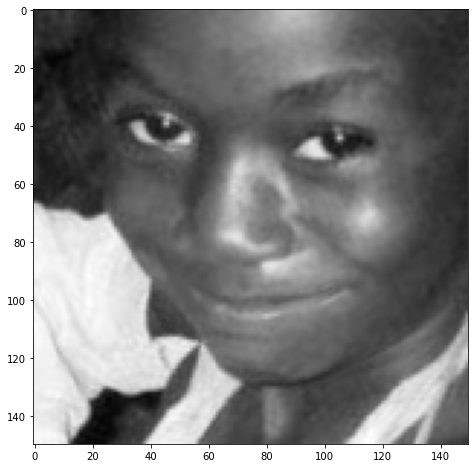

In [12]:
import matplotlib.pyplot as plt
image_raw = x_train[0]
print(image_raw.max())
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

Number of components explaining 95% variance: 8


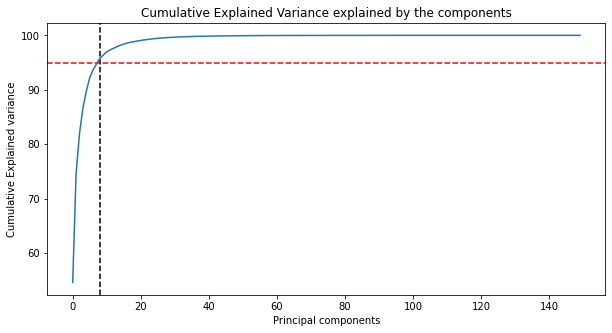

In [13]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [16]:
!pip install pillow

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
bluec = []
greenc = []
redc = []
#     blue.append(b)
#     green.append(g)
#     red.append(r)
new_x_train = []
from PIL import Image
import numpy as np

for i in range(len(x_train)):
    blue,green,red = cv2.split(x_train[i])
    blue_temp_df = pd.DataFrame(data = blue)
    green_temp_df = pd.DataFrame(data = green)
    red_temp_df = pd.DataFrame(data = red)
    df_blue = blue/255
    df_green = green/255
    df_red = red/255
    pca_b = PCA(n_components=0.95)
    pca_b.fit(df_blue)
    trans_pca_b = pca_b.transform(df_blue)
    pca_g = PCA(n_components=0.95)
    pca_g.fit(df_green)
    trans_pca_g = pca_g.transform(df_green)
    pca_r = PCA(n_components=0.95)
    pca_r.fit(df_red)
    trans_pca_r = pca_r.transform(df_red)
    bluec.append(trans_pca_b.shape[1])
    greenc.append(trans_pca_r.shape[1])
    redc.append(trans_pca_g.shape[1])
    b_arr = pca_b.inverse_transform(trans_pca_b)
    g_arr = pca_g.inverse_transform(trans_pca_g)
    r_arr = pca_r.inverse_transform(trans_pca_r)
    img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
    data = np.array(img_reduced)
    flattened = data.flatten()
    new_x_train.append(flattened)
    

In [12]:
# max components needed to get 95% variance
print(max(bluec))  #43
print(max(greenc)) #33
print(max(redc)) #36

43
33
36


In [13]:
# average number of components needed to get 95% variance
print(sum(bluec)/len(bluec)) #10.121295279912184
print(sum(greenc)/len(greenc)) #8.979631662397853
print(sum(redc)/len(redc)) #9.681729479204781

10.121295279912184
8.979631662397853
9.681729479204781


In [10]:
blue,green,red = cv2.split(x_train[0])
blue_temp_df = pd.DataFrame(data = blue)
green_temp_df = pd.DataFrame(data = green)
red_temp_df = pd.DataFrame(data = red)
df_blue = blue/255
df_green = green/255
df_red = red/255


In [11]:
pca_b = PCA(n_components=0.95)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=0.95)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=0.95)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [12]:
print(trans_pca_b.shape[1])
print(trans_pca_r.shape)
print(trans_pca_g.shape)

8
(150, 10)
(150, 8)


In [18]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9088092762976885
Green Channel: 0.9069121852517128
Red Channel  : 0.902575459331274


In [19]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)

In [20]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(150, 150, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


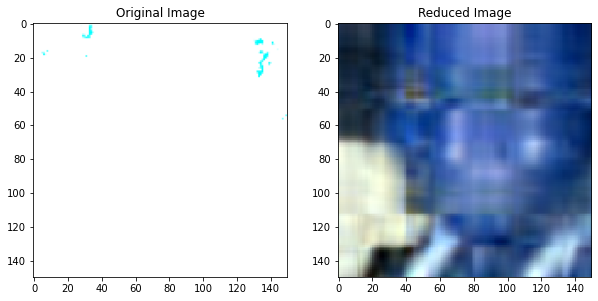

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(x_train[0])
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced,interpolation='nearest')
plt.show()

In [12]:
# Converting the image feature values from (240,320) dimension to 240*320 to make it compatible to fit in PCA.
def squash(data):
    faces = np.zeros(shape=(data.shape[1]*data.shape[2], data.shape[0]))
    for i in range(data.shape[0]):
        faces[:,i] = data[i].reshape(data.shape[1]*data.shape[2])
    print(faces.shape)
    return faces.transpose()

In [13]:
print(x_train.shape)

(16398, 150, 150, 3)


In [19]:
x_train = squash(x_train)
x_validate = squash(x_validate)
print(x_train.shape)
print(x_validate.shape)

(22500, 16398)
(22500, 5467)
(16398, 22500)
(5467, 22500)


In [20]:
#x_train = x_train.reshape(-1, 3)

In [21]:
#x_train.shape

In [22]:
#x_validate = x_validate.reshape(-1, 3)

In [23]:
n_components = 0.95 # Selecting number of components which cover 95% variance of the data i.e selecting 
#the most distinguising features and discarding the less important one. 
pca = PCA(n_components=n_components).fit(x_train)
x_train_pca = pca.transform(x_train)
x_validate_pca = pca.transform(x_validate)

In [24]:
print(x_train_pca.shape)
print(x_validate_pca.shape)

(16398, 220)
(5467, 220)


In [ ]:
clf = SVC(kernel='rbf', class_weight='balanced',C=100)
clf = clf.fit(new_x_train_pca, y_train)

In [ ]:
y_pred = clf.predict(x_validate_pca)
print(classification_report(y_validate, y_pred, target_names=classes))